<a href="https://colab.research.google.com/github/DanielMSousa/curso-deeplearning-na-pratica/blob/main/TAREFA_1%20-%20Previs%C3%A3o_de_Lucros_(sorvetes).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Definição do problema

- Base de dados:
  - Input (X): Temperatura
  - Output (Y): Lucro diário em dólares 

# Etapa 1: Importação das bibliotecas

In [31]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
tf.__version__

'2.7.0'

# Etapa 2: Importação da base de dados

In [32]:
# Leitura do arquivo csv
df = pd.read_csv('SalesData.csv')

In [33]:
# Visualização de todos os registros
df

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [34]:
# Visualização dos 5 primeiros registros
df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [35]:
# Visualização dos 10 últimos registros
df.tail(10)

,Temperature,Revenue
490,23.824922,584.399945
491,34.472169,809.352520
492,23.056214,552.819351
493,14.931506,377.430928
494,25.112066,571.434257
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [36]:
# Visualização de informações da base de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [37]:
# Descrição da base de dados
df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


# Etapa 3: Visualização da base de dados

Text(0.5, 1.0, 'relation between revenue and temperature')

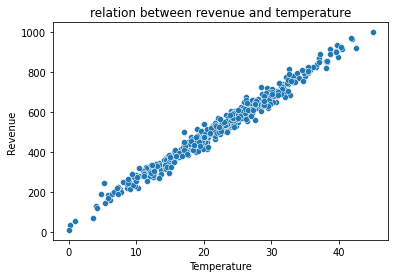

In [85]:
# Scatter plot do Seborn
sns.scatterplot(data=df, x='Temperature', y='Revenue')
plt.title('relation between revenue and temperature')

# Etapa 4: Criação das variáveis da base de dados

In [39]:
# Criação das variáveis X_train e y_train
X_train = df['Temperature']
y_train = df['Revenue']

In [40]:
# Formato da variável X_train
X_train.shape

(500,)

In [41]:
# Formato da variável y_train
y_train.shape

(500,)

# Etapa 5: Criação e construção do modelo

In [42]:
# Construção do modelo sequencial
model = tf.keras.Sequential(layers = tf.keras.layers.Dense(1, input_shape=[1]))

In [43]:
# Sumário do modelo
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [44]:
# Compilar o modelo
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mean_squared_error')

In [ ]:
# Treinamento
hist = model.fit(X_train, y_train, epochs=500)

# Etapa 6: Avaliação do modelo 

In [47]:
# Visualização do dicionário com os resultados
hist.history.keys()

dict_keys(['loss'])

Text(0.5, 1.0, 'Loss function history')

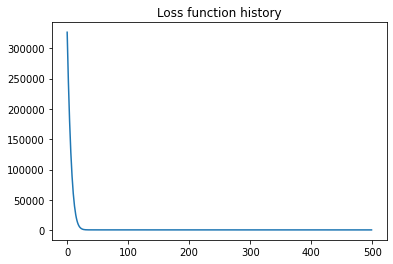

In [86]:
# Gráfico com os resultados da loss function
plt.plot(hist.history['loss']);
plt.title('Loss function history')


In [54]:
# Visualização dos pesos
model.weights

[<tf.Variable 'dense_3/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[21.521578]], dtype=float32)>,
 <tf.Variable 'dense_3/bias:0' shape=(1,) dtype=float32, numpy=array([44.77571], dtype=float32)>]

In [55]:
# Previsões com o modelo treinado, com a temperatura de 5 graus
model.predict([5])

array([[152.3836]], dtype=float32)

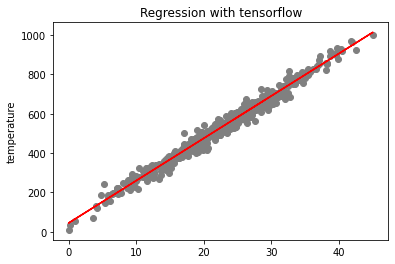

In [84]:
# Gráfico com a reta da regressão linear
plt.scatter(X_train, y_train, color='gray')
plt.plot(X_train, model.predict(X_train), color='red')
plt.ylabel('revenue')
plt.ylabel('temperature')
plt.title('Regression with tensorflow');

# Etapa 7: Confirmar os resultados usando sklearn

In [64]:
# Usar o sklearn para obter os mesmos resultados
from sklearn.linear_model import LinearRegression
import numpy as np

In [65]:
lr = LinearRegression()

In [67]:
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)

In [68]:
lr.fit(X_train, y_train)

LinearRegression()

In [75]:
lr.predict([[5]])

array([[152.04939464]])

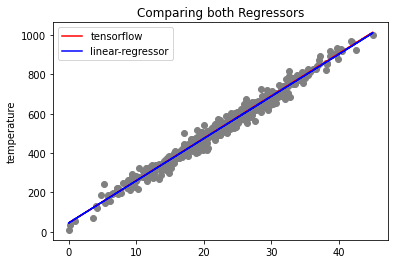

In [83]:
plt.scatter(X_train, y_train, color='gray')
plt.plot(X_train, model.predict(X_train), color='red')
plt.plot(X_train, lr.predict(X_train), color='blue')
plt.ylabel('revenue')
plt.ylabel('temperature')
plt.legend(labels=['tensorflow', 'linear-regressor'])
plt.title('Comparing both Regressors');

In [81]:
lr.coef_

array([[21.44362551]])

In [82]:
lr.intercept_

array([44.83126709])